### PRAVEEN K NAIR, Data Science and Business Analytics Intern at The Spark Foundation
# Task 1 - Prediction using Supervised ML
### Problem - Predict Percentage of a student based on no: of study hours by Linear Regression

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading dataset

In [2]:
# Loading data from external url
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [3]:
# Viewing first 5 rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data Analysis

In [4]:
# No of rows and columns (dimension of dataset)
data.shape

(25, 2)

In [5]:
# Checking datatypes in the data
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# Checking if there any duplicated rows
data.duplicated().any()

False

In [7]:
# Checking if there any null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Data Visualization

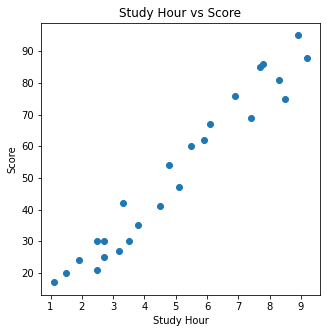

In [8]:
# Visualizing Study Hours vs Score using scatterplot
plt.figure(figsize=(5,5))
plt.xlabel("Study Hour")
plt.ylabel("Score")
plt.title("Study Hour vs Score")
plt.scatter(data.Hours,data.Scores)

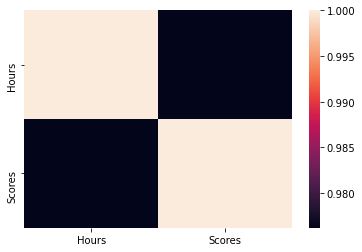

In [9]:
# Checking correlation between Study Hours and Scores
sns.heatmap(data.corr())

#### Training the Model

In [10]:
# Importing libraries required for training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
# Splitting data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(data[["Hours"]],data[["Scores"]],random_state=0)

In [12]:
# Fitting model using linear regression
clf = LinearRegression()
model = clf.fit(X_train,y_train)

In [13]:
# Predicting the Output using data
y_pred = model.predict(X_test)


#### Visualizing Prediction

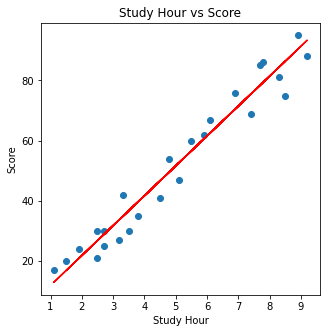

In [14]:
# Plotting the predicted Output with Input
plt.figure(figsize=(5,5))
plt.xlabel("Study Hour")
plt.ylabel("Score")
plt.title("Study Hour vs Score")
plt.scatter(data.Hours,data.Scores)
plt.plot(data[["Hours"]],model.predict(data[["Hours"]]),color='red')

#### Comparing test results

In [15]:
y_test_arr = y_test.to_numpy()
d = np.concatenate((y_test_arr,y_pred),axis=1)
df = pd.DataFrame(d,columns=["Actual Output","Predicted Output"])
df

,Actual Output,Predicted Output
0,20.0,16.844722
1,27.0,33.745575
2,69.0,75.500624
3,30.0,26.786400
4,62.0,60.588106
5,35.0,39.710582
6,24.0,20.821393


#### Evaluating the Model

In [16]:
# Importing libraries for evaluating the model
from sklearn import metrics

In [17]:
# Model score
print("Accuracy of the model is {} %".format(model.score(X_test,y_test)*100))

Accuracy of the model is 93.67661043365057 %


In [18]:
# Mean absolute error
print("Error of the model is {}".format(metrics.mean_absolute_error(y_test,y_pred)))

Error of the model is 4.130879918502482


#### Final Prediction

In [19]:
# Final Output prediction
x=model.predict([[9.25]])
print("If a student studies 9.25hrs a day he/she will get {} % marks".format(x[0][0]))

If a student studies 9.25hrs a day he/she will get 93.89272889341652 % marks
